In [91]:
import FSRmsg_pb2
import numpy as np
import matplotlib.pyplot as plt
import os


In [92]:
data_dir = '/home/hrg/ws_moveit/data/short_rigid_letters_2407_D_rigid/'

def show_fsrmsg(fsr_data_msg, title):
  len_frames = len(fsr_data_msg)
  all_layer1 = np.zeros((len_frames,16,16), dtype=np.int32)
  all_layer2 = np.zeros((len_frames,16,16), dtype=np.int32)
  for i in range(len_frames):
      data = fsr_data_msg[i]
      value = data.fsr
      ts = data.timestamp
      fsr_data = np.fromstring(value, dtype=int, sep=' ')
      fsr_data= fsr_data.reshape(16, 32)
      all_layer1[i] = fsr_data[:, 0:16]
      all_layer2[i] = fsr_data[:, 16:]
  mean_layer1 = all_layer1.mean(axis=0)
  mean_layer2 = all_layer2.mean(axis=0)
  vmin = min(np.min(mean_layer1), np.min(mean_layer2))
  vmax = max(np.max(mean_layer1), np.max(mean_layer2))
  std_layer1 = all_layer1.std(axis=0)
  std_layer2 = all_layer2.std(axis=0)
  s_vmin = min(np.min(std_layer1), np.min(std_layer2))
  s_vmax = max(np.max(std_layer1), np.max(std_layer2))
  fig, axs = plt.subplots(2, 2, figsize=(12, 12))
  pcm = axs[0, 0].imshow(mean_layer1, cmap='viridis', interpolation='none')#, vmin=vmin, vmax=vmax
  fig.colorbar(pcm, ax=axs[0, 0])
  axs[0, 0].set_title('mean layer1')
  pcm = axs[0, 1].imshow(mean_layer2, cmap='viridis', interpolation='none')#, vmin=vmin, vmax=vmax)
  fig.colorbar(pcm, ax=axs[0, 1])
  axs[0, 1].set_title('mean layer2')
  pcm = axs[1, 0].imshow(std_layer1, cmap='viridis', interpolation='none')#, vmin=s_vmin, vmax=s_vmax)
  fig.colorbar(pcm, ax=axs[1, 0])
  axs[1, 0].set_title('std layer1')
  pcm = axs[1, 1].imshow(std_layer2, cmap='viridis', interpolation='none')#, vmin=s_vmin, vmax=s_vmax)
  fig.colorbar(pcm, ax=axs[1, 1])
  axs[1, 1].set_title('std layer2')
  fig.suptitle(title)
  return mean_layer1, mean_layer2, std_layer1, std_layer2

def read_fsr_msg(file_f):
  fsrmsg = FSRmsg_pb2.FSRMsg()
  read_folder = data_dir + 'fsr/' + file_f
  with open(read_folder, "rb") as f:
    fsrmsg.ParseFromString(f.read())
  print(file_f, ' data length:', len(fsrmsg.fsr_data))
  return fsrmsg

In [93]:
import glob
fsr_data_all = glob.glob(data_dir + 'fsr/*.bin')
fsr_data_all = [os.path.basename(f) for f in fsr_data_all]
fsr_data_all.sort()
print(fsr_data_all)
fsr_calib_data = glob.glob(data_dir + 'fsr/calib/*.bin')
fsr_calib_data = [os.path.basename(f) for f in fsr_calib_data]
fsr_calib_data.sort()
print(fsr_calib_data)
print(len(fsr_data_all), len(fsr_calib_data))

['d_rigid_flat_0.bin', 'd_rigid_flat_1.bin', 'd_rigid_flat_2.bin', 'd_rigid_flat_3.bin', 'd_rigid_flat_4.bin', 'd_rigid_flat_5.bin', 'd_rigid_flat_6.bin', 'd_rigid_flat_7.bin', 'd_rigid_flat_8.bin', 'd_rigid_flat_9.bin', 'd_rigid_wave_0.bin', 'd_rigid_wave_1.bin', 'd_rigid_wave_2.bin', 'd_rigid_wave_3.bin', 'd_rigid_wave_4.bin', 'd_rigid_wave_5.bin', 'd_rigid_wave_6.bin', 'd_rigid_wave_7.bin', 'd_rigid_wave_8.bin', 'd_rigid_wave_9.bin']
['d_rigid_flat_0_calib.bin', 'd_rigid_flat_1_calib.bin', 'd_rigid_flat_2_calib.bin', 'd_rigid_flat_3_calib.bin', 'd_rigid_flat_4_calib.bin', 'd_rigid_flat_5_calib.bin', 'd_rigid_flat_6_calib.bin', 'd_rigid_flat_7_calib.bin', 'd_rigid_flat_8_calib.bin', 'd_rigid_flat_9_calib.bin', 'd_rigid_wave_0_calib.bin', 'd_rigid_wave_1_calib.bin', 'd_rigid_wave_2_calib.bin', 'd_rigid_wave_3_calib.bin', 'd_rigid_wave_4_calib.bin', 'd_rigid_wave_5_calib.bin', 'd_rigid_wave_6_calib.bin', 'd_rigid_wave_7_calib.bin', 'd_rigid_wave_8_calib.bin', 'd_rigid_wave_9_calib.bin'

In [94]:
c_soft_concave = []
c_soft_convex = []
c_soft_flat = []
c_soft_wave = []
for file_f in fsr_data_all:
  if 'rigid_concave' in file_f:
    c_soft_concave.append(file_f)
  elif 'rigid_convex' in file_f:
    c_soft_convex.append(file_f)
  elif 'rigid_flat' in file_f:
    c_soft_flat.append(file_f)
  elif 'rigid_straight' in file_f:
    c_soft_wave.append(file_f)

In [95]:
test_data = fsr_data_all[0] #c_rigid_concave[0]
test_calib_data = fsr_calib_data[0]
print(test_data, test_calib_data)

calib_fsrmsg = read_fsr_msg('calib/' + test_calib_data)
fsrmsg = read_fsr_msg(test_data)

len_frames = len(fsrmsg.fsr_data)
print('calib data length:', len(calib_fsrmsg.fsr_data), 'test data length:', len_frames)

d_rigid_flat_0.bin d_rigid_flat_0_calib.bin
calib/d_rigid_flat_0_calib.bin  data length: 292668
d_rigid_flat_0.bin  data length: 40374
calib data length: 292668 test data length: 40374


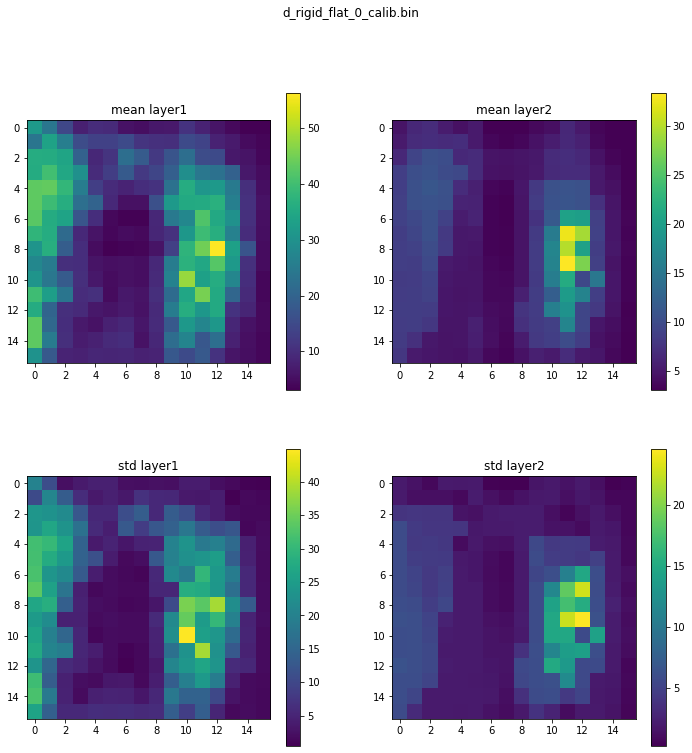

In [96]:
calib_layer1, calib_layer2, std_layer1, std_layer2 = show_fsrmsg(calib_fsrmsg.fsr_data, test_calib_data)

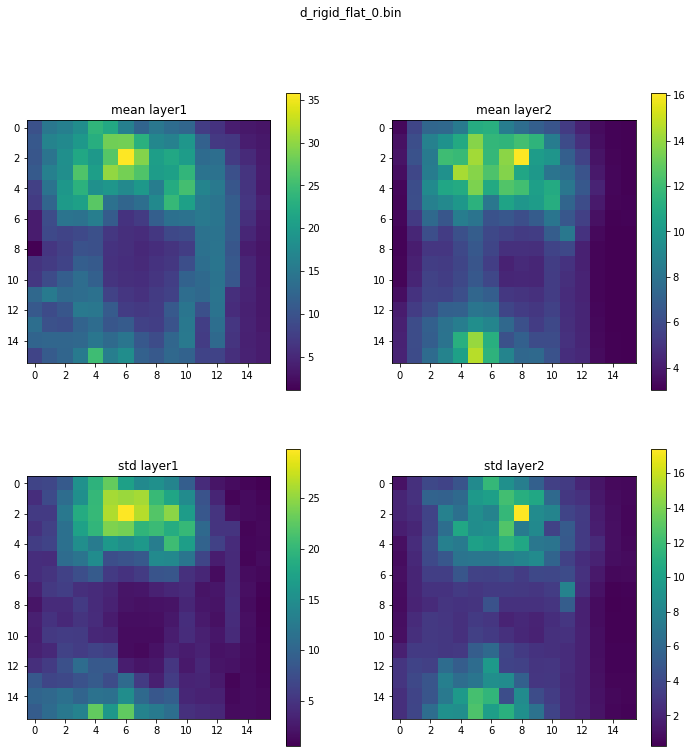

In [97]:
mean_layer1_0, mean_layer2_0, std_layer1_0, std_layer2_0 = show_fsrmsg(fsrmsg.fsr_data, test_data)

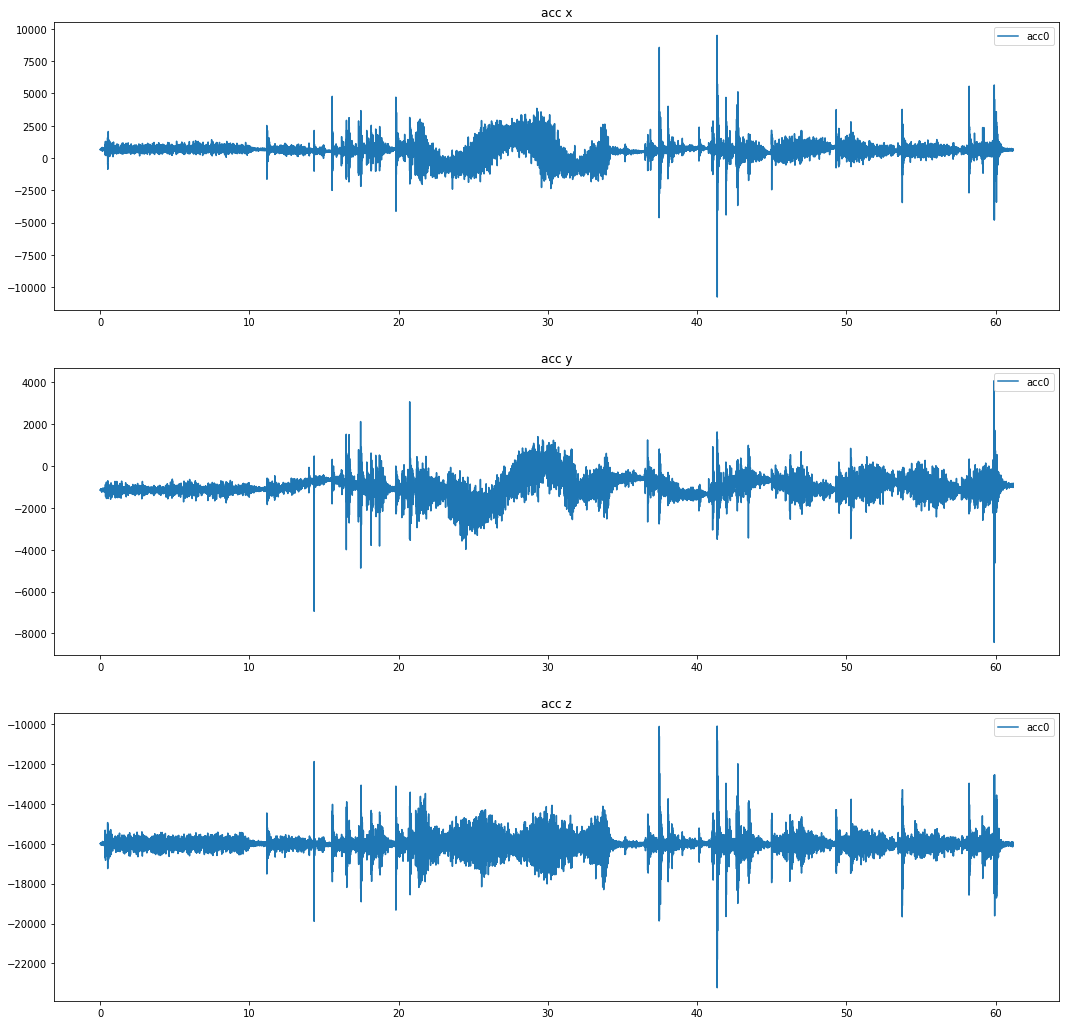

[[   624  -1168 -15984]
 [    96   -864 -15936]
 [   576    912 -15856]
 [  -592    -48 -15136]
 [   128   -896 -15520]
 [   720  -1312 -15776]
 [   512    176 -15776]
 [  1104   -720 -16256]
 [   160   -960 -15888]
 [   352   -608 -16144]
 [   640   -272 -16112]
 [  1520   -336 -15888]
 [  1920   -272 -16176]
 [   416   -240 -15888]
 [    80   -864 -16176]
 [   400      0 -16144]]
0.015333749


In [98]:
# vis acc
begin_ts = fsrmsg.fsr_data[0].timestamp
len_frames = len(fsrmsg.fsr_data)
all_acc = np.zeros((len_frames,16, 3), dtype=np.int32)
all_ts = np.zeros(len_frames, dtype=np.float32)
for i in range(len_frames):
    data = fsrmsg.fsr_data[i]
    value = data.acc
    all_ts[i] = float(int(data.timestamp) - int(begin_ts)) * 1e-9
    acc_data = np.fromstring(value, dtype=int, sep=' ')
    acc_data = acc_data.reshape(16, 3)
    all_acc[i] = acc_data

fig, axs = plt.subplots(3, 1, figsize=(18, 18))
for i in range(1):
    axs[0].plot(all_ts, all_acc[:, i, 0], label='acc'+str(i))
    axs[1].plot(all_ts, all_acc[:, i, 1], label='acc'+str(i))
    axs[2].plot(all_ts, all_acc[:, i, 2], label='acc'+str(i))
    #set y limit
    #axs[2].set_ylim(-17000, -10000)
axs[0].legend()
axs[0].set_title('acc x')
axs[1].legend()
axs[1].set_title('acc y')
axs[2].legend()
axs[2].set_title('acc z')
plt.show()

print(all_acc[1])
print(all_ts[1])

In [99]:
kinova_data = glob.glob(data_dir + 'kinova/*')
kinova_data = [os.path.basename(f) for f in kinova_data]
kinova_data.sort()
print(kinova_data)

['d_rigid_flat_cmd_precision_0.csv', 'd_rigid_flat_cmd_precision_1.csv', 'd_rigid_flat_cmd_precision_2.csv', 'd_rigid_flat_cmd_precision_3.csv', 'd_rigid_flat_cmd_precision_4.csv', 'd_rigid_flat_cmd_precision_5.csv', 'd_rigid_flat_cmd_precision_6.csv', 'd_rigid_flat_cmd_precision_7.csv', 'd_rigid_flat_cmd_precision_8.csv', 'd_rigid_flat_cmd_precision_9.csv', 'd_rigid_flat_cmd_pressing_0.csv', 'd_rigid_flat_cmd_pressing_1.csv', 'd_rigid_flat_cmd_pressing_2.csv', 'd_rigid_flat_cmd_pressing_3.csv', 'd_rigid_flat_cmd_pressing_4.csv', 'd_rigid_flat_cmd_pressing_5.csv', 'd_rigid_flat_cmd_pressing_6.csv', 'd_rigid_flat_cmd_pressing_7.csv', 'd_rigid_flat_cmd_pressing_8.csv', 'd_rigid_flat_cmd_pressing_9.csv', 'd_rigid_flat_cmd_slipping_0.csv', 'd_rigid_flat_cmd_slipping_1.csv', 'd_rigid_flat_cmd_slipping_2.csv', 'd_rigid_flat_cmd_slipping_3.csv', 'd_rigid_flat_cmd_slipping_4.csv', 'd_rigid_flat_cmd_slipping_5.csv', 'd_rigid_flat_cmd_slipping_6.csv', 'd_rigid_flat_cmd_slipping_7.csv', 'd_rigid_

In [100]:
labels = test_data.split('.')[0].split('_')
print(labels)
cmd_pressing = labels[0] + '_' + labels[1] + '_' + labels[2] + '_cmd_pressing_' + labels[3] + '.csv'
cmd_precision = labels[0] + '_' + labels[1] + '_' + labels[2] + '_cmd_precision_' + labels[3] + '.csv'
cmd_slipping = labels[0] + '_' + labels[1] + '_' + labels[2] + '_cmd_slipping_' + labels[3] + '.csv'
print(cmd_pressing, cmd_precision, cmd_slipping)


['d', 'rigid', 'flat', '0']
d_rigid_flat_cmd_pressing_0.csv d_rigid_flat_cmd_precision_0.csv d_rigid_flat_cmd_slipping_0.csv


In [101]:
from numpy import genfromtxt
cmd_dir = data_dir + 'kinova/'
test_cmd_pressing = genfromtxt(cmd_dir + cmd_pressing, delimiter=',')
test_cmd_precision = genfromtxt(cmd_dir + cmd_precision, delimiter=',')
test_cmd_slipping = genfromtxt(cmd_dir + cmd_slipping, delimiter=',')
print(test_cmd_pressing.shape, test_cmd_precision.shape, test_cmd_slipping.shape)

(1710, 7) (2137, 7) (4275, 7)


In [102]:
t_start = test_cmd_pressing[0, 0]
t_end = test_cmd_pressing[-1, 0]
print(t_start, t_end)

start_idx = -1
end_idx = -1

for i in range(len(fsrmsg.fsr_data)):
    if start_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_start:
        start_idx = i
    if end_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_end:
        end_idx = i
        break
data_pressing = fsrmsg.fsr_data[start_idx:end_idx]
print(start_idx, end_idx)

1.721840191061836e+18 1.72184114447978e+18
0 13734


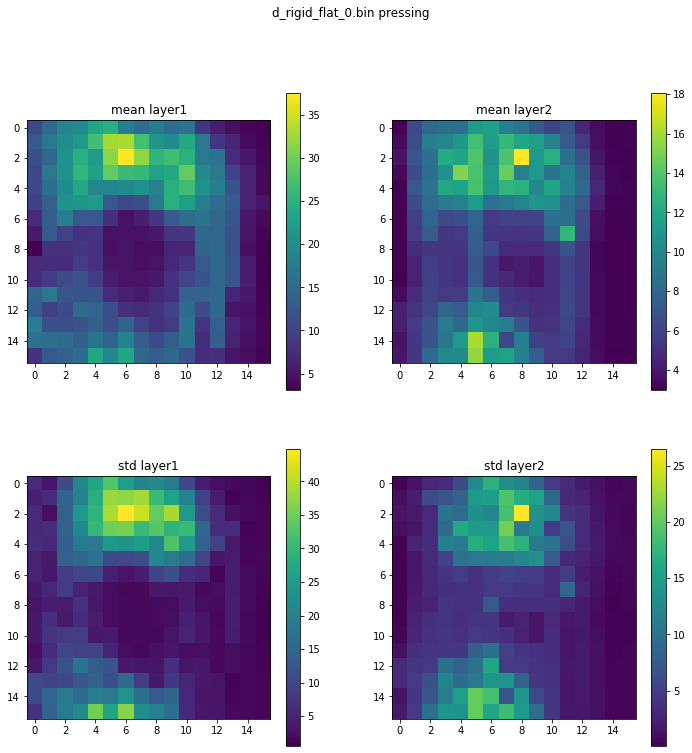

In [103]:
mean_layer1_pressing, mean_layer2_pressing, std_layer1_pressing, std_layer2_pressing = show_fsrmsg(data_pressing, test_data + ' pressing')

In [104]:
len_pressing = len(data_pressing)
print('pressing data length:', len_pressing)
sample_num = int(len_pressing / 10)
print('sample num:', sample_num)
sample_data = data_pressing[::sample_num]
print('sample data length:', len(sample_data))
ts_start = float(int(data_pressing[0].timestamp) * (10**-9))
print('ts_start:', ts_start)


pressing data length: 13734
sample num: 1373
sample data length: 11
ts_start: 1721841123.486289


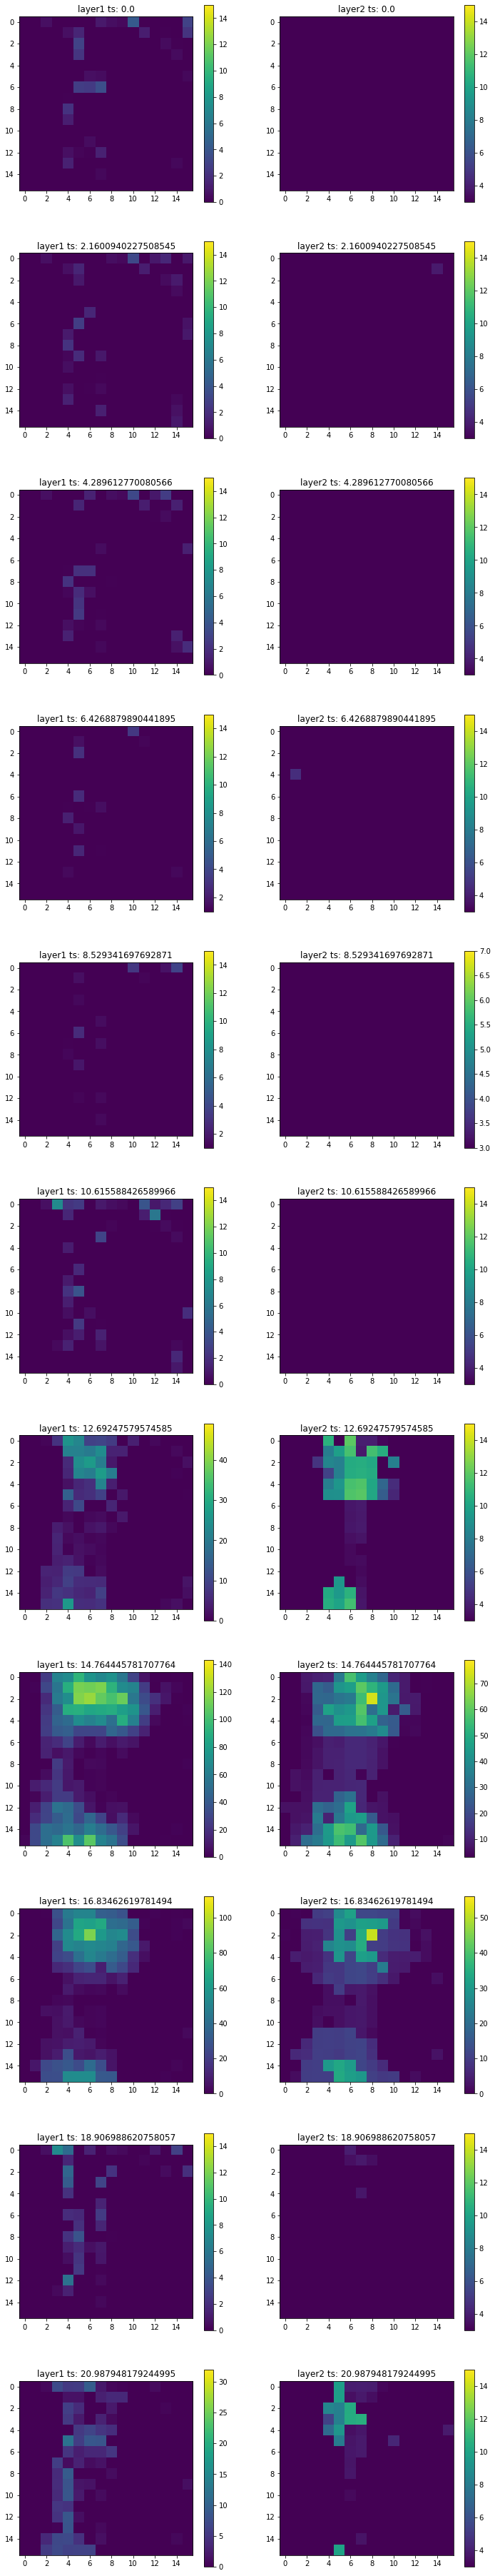

In [105]:
# visualize the data according to the timestamp
from mpl_toolkits.axes_grid1 import make_axes_locatable

ts_bins = [(float(int(data.timestamp) * (10**-9)) - ts_start) for data in sample_data]
fig, axs = plt.subplots(len(ts_bins), 2, figsize=(12, 6*len(ts_bins)))
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

for i in range(len(ts_bins)):
    value = sample_data[i].fsr
    ts = ts_bins[i]
    fsr_data = np.fromstring(value, dtype=int, sep=' ').reshape(16, 32)
    layer_1 = fsr_data[:, 0:16] - calib_layer1
    layer_2 = fsr_data[:, 16:] - calib_layer2
    min_val_1 = np.min(fsr_data[:, 0:16])
    max_val_1 = np.max(fsr_data[:, 0:16])
    min_val_2 = np.min(fsr_data[:, 16:])
    max_val_2 = np.max(fsr_data[:, 16:])

    im = axs[i, 0].imshow(layer_1, cmap='viridis', interpolation='none', vmin=min_val_1, vmax=max_val_1)
    im2 = axs[i, 1].imshow(layer_2, cmap='viridis', interpolation='none', vmin=min_val_2, vmax=max_val_2)
    axs[i, 0].set_title('layer1 ts: ' + str(ts))
    axs[i, 1].set_title('layer2 ts: ' + str(ts))
    fig.colorbar(im, ax=axs[i, 0])
    fig.colorbar(im2, ax=axs[i, 1])
# fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.05)
# plt.title('FSR data')

1.721840198171239e+18 1.7218411573319288e+18
0 22257


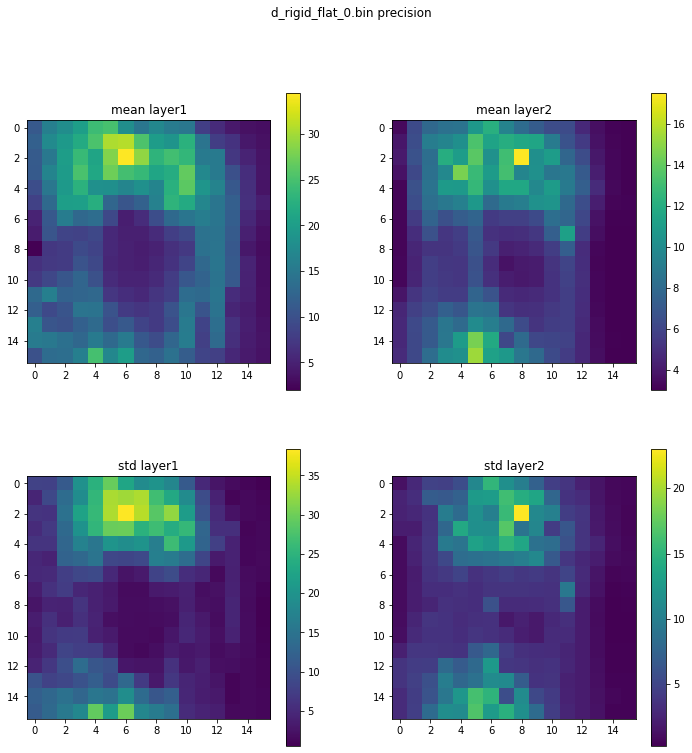

In [106]:
t_start = test_cmd_precision[0, 0]
t_end = test_cmd_precision[-1, 0]
print(t_start, t_end)

start_idx = -1
end_idx = -1

for i in range(len(fsrmsg.fsr_data)):
    if start_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_start:
        start_idx = i
    if end_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_end:
        end_idx = i
        break
data_precision = fsrmsg.fsr_data[start_idx:end_idx]
print(start_idx, end_idx)
mean_layer1_precision, mean_layer2_precision, std_layer1_precision, std_layer2_precision = show_fsrmsg(data_precision, test_data + ' precision')

precision data length: 22257
sample num: 2225
sample data length: 11
ts_start: 1721841123.486289


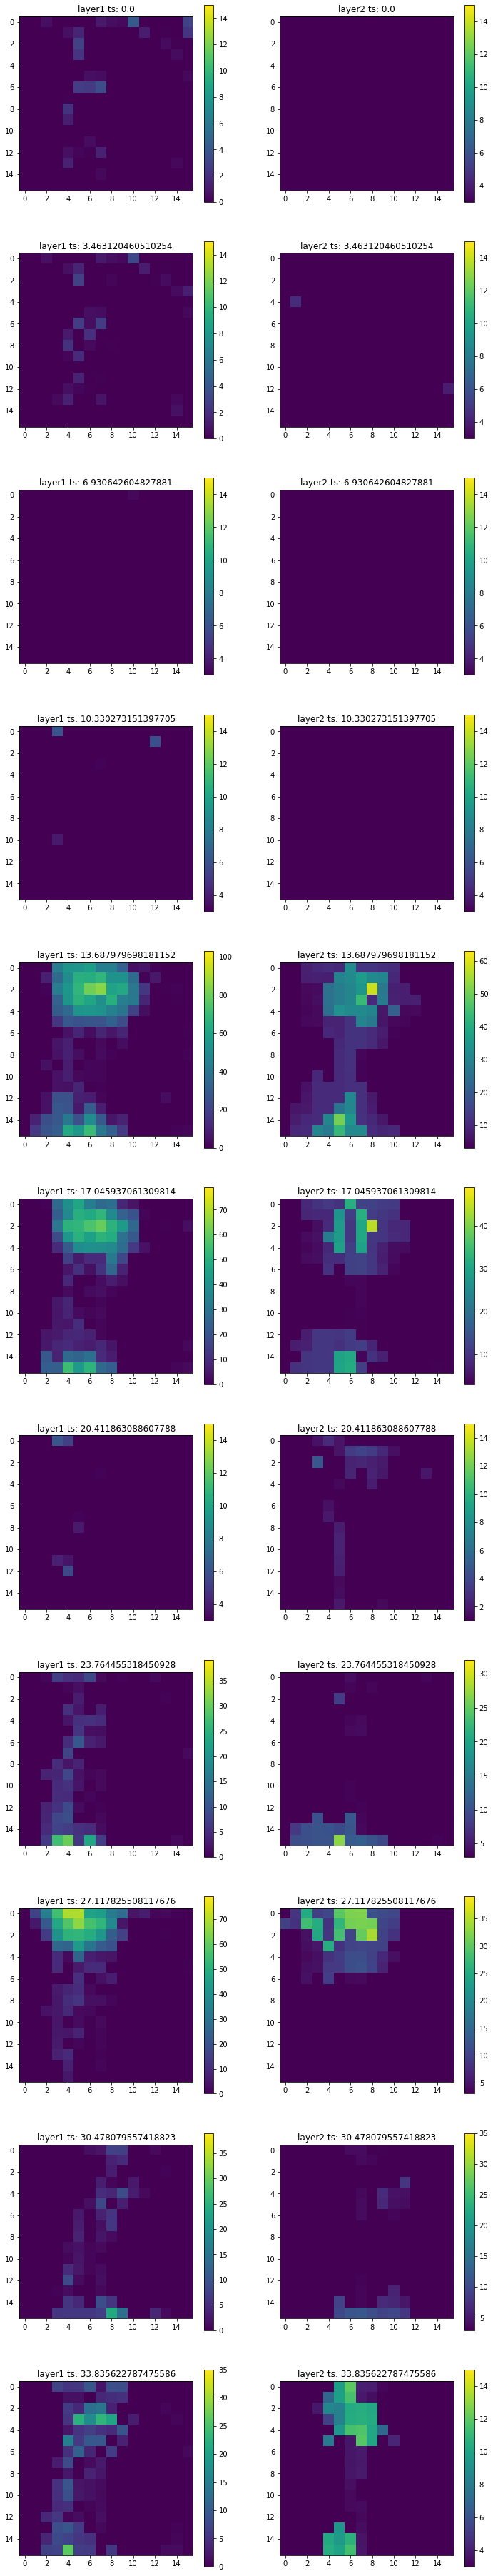

In [107]:
len_precision = len(data_precision)
print('precision data length:', len_precision)
sample_num = int(len_precision / 10)
print('sample num:', sample_num)
sample_data = data_precision[::sample_num]
print('sample data length:', len(sample_data))
ts_start = float(int(data_precision[0].timestamp) * (10**-9))
print('ts_start:', ts_start)

ts_bins = [(float(int(data.timestamp) * (10**-9)) - ts_start) for data in sample_data]
fig, axs = plt.subplots(len(ts_bins), 2, figsize=(12, 6*len(ts_bins)))
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

for i in range(len(ts_bins)):
    value = sample_data[i].fsr
    ts = ts_bins[i]
    fsr_data = np.fromstring(value, dtype=int, sep=' ').reshape(16, 32)
    layer_1 = fsr_data[:, 0:16] - calib_layer1
    layer_2 = fsr_data[:, 16:] - calib_layer2
    min_val_1 = np.min(fsr_data[:, 0:16])
    max_val_1 = np.max(fsr_data[:, 0:16])
    min_val_2 = np.min(fsr_data[:, 16:])
    max_val_2 = np.max(fsr_data[:, 16:])

    im = axs[i, 0].imshow(layer_1, cmap='viridis', interpolation='none', vmin=min_val_1, vmax=max_val_1)
    im2 = axs[i, 1].imshow(layer_2, cmap='viridis', interpolation='none', vmin=min_val_2, vmax=max_val_2)
    axs[i, 0].set_title('layer1 ts: ' + str(ts))
    axs[i, 1].set_title('layer2 ts: ' + str(ts))
    fig.colorbar(im, ax=axs[i, 0])
    fig.colorbar(im2, ax=axs[i, 1])

1.7218402070607555e+18 1.7218411830324933e+18
0 39308


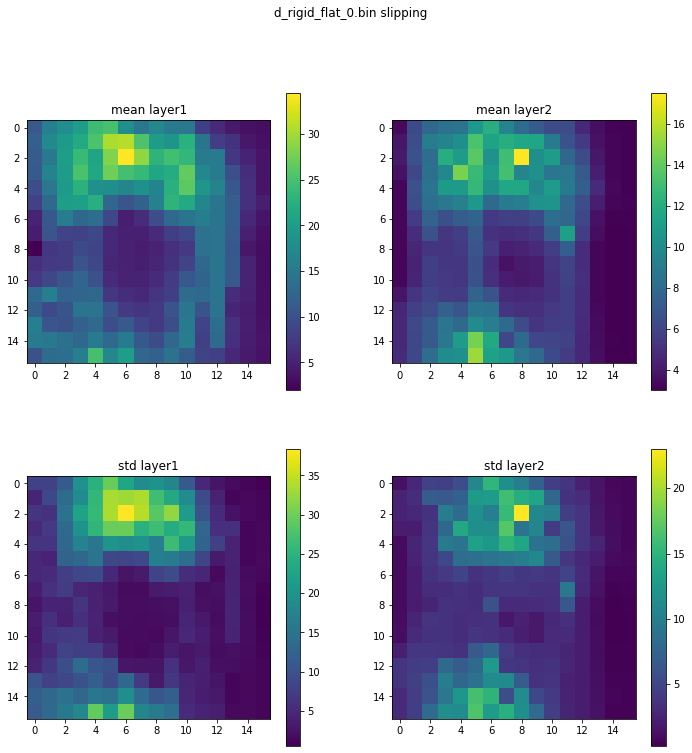

In [108]:
t_start = test_cmd_slipping[0, 0]
t_end = test_cmd_slipping[-1, 0]
print(t_start, t_end)

start_idx = -1
end_idx = -1

for i in range(len(fsrmsg.fsr_data)):
    if start_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_start:
        start_idx = i
    if end_idx == -1 and int(fsrmsg.fsr_data[i].timestamp) > t_end:
        end_idx = i
        break
data_slipping = fsrmsg.fsr_data[start_idx:end_idx]
print(start_idx, end_idx)
mean_layer1_slipping, mean_layer2_slipping, std_layer1_slipping, std_layer2_slipping = show_fsrmsg(data_precision, test_data + ' slipping')

slipping data length: 39308
sample num: 2620
sample data length: 16
ts_start: 1721841123.486289


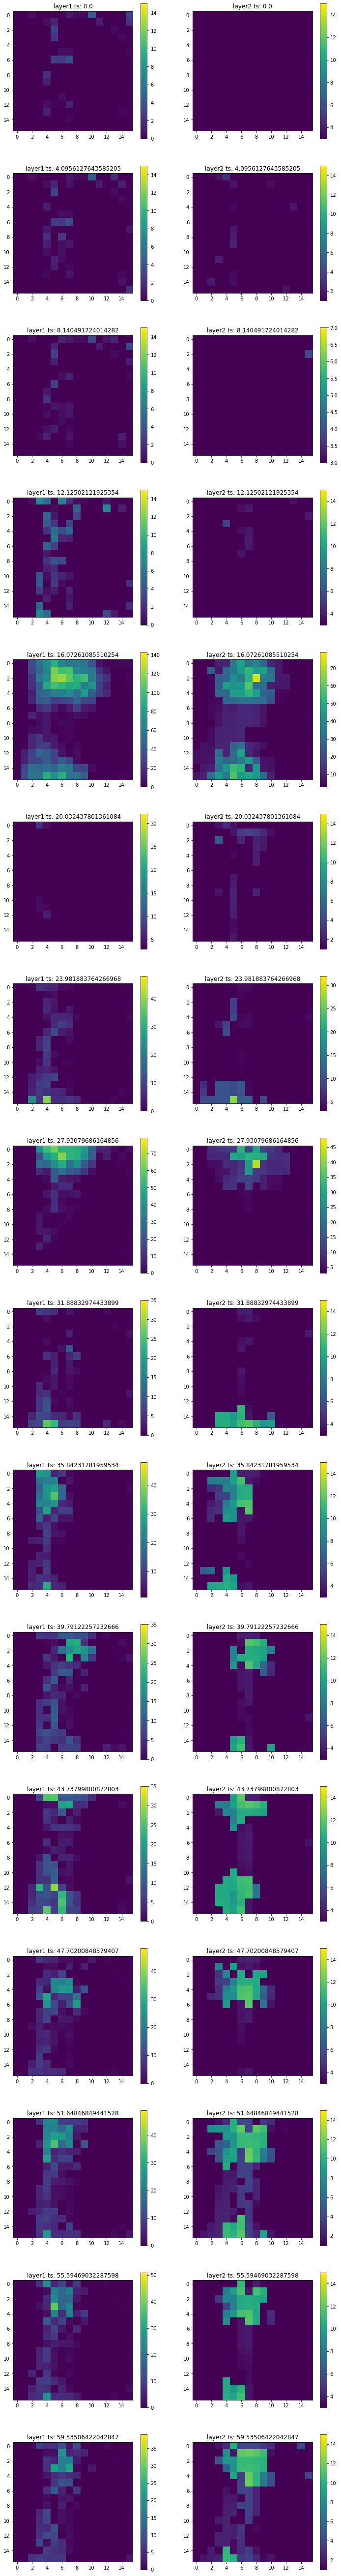

In [79]:
len_slipping = len(data_slipping)
print('slipping data length:', len_slipping)
sample_num = int(len_slipping / 15)
print('sample num:', sample_num)
sample_data = data_slipping[::sample_num]
print('sample data length:', len(sample_data))
ts_start = float(int(data_slipping[0].timestamp) * (10**-9))
print('ts_start:', ts_start)

ts_bins = [(float(int(data.timestamp) * (10**-9)) - ts_start) for data in sample_data]
fig, axs = plt.subplots(len(ts_bins), 2, figsize=(12, 6*len(ts_bins)))
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

for i in range(len(ts_bins)):
    value = sample_data[i].fsr
    ts = ts_bins[i]
    fsr_data = np.fromstring(value, dtype=int, sep=' ').reshape(16, 32)
    layer_1 = fsr_data[:, 0:16] - calib_layer1
    layer_2 = fsr_data[:, 16:] - calib_layer2
    min_val_1 = np.min(fsr_data[:, 0:16])
    max_val_1 = np.max(fsr_data[:, 0:16])
    min_val_2 = np.min(fsr_data[:, 16:])
    max_val_2 = np.max(fsr_data[:, 16:])

    im = axs[i, 0].imshow(layer_1, cmap='viridis', interpolation='none', vmin=min_val_1, vmax=max_val_1)
    im2 = axs[i, 1].imshow(layer_2, cmap='viridis', interpolation='none', vmin=min_val_2, vmax=max_val_2)
    axs[i, 0].set_title('layer1 ts: ' + str(ts))
    axs[i, 1].set_title('layer2 ts: ' + str(ts))
    fig.colorbar(im, ax=axs[i, 0])
    fig.colorbar(im2, ax=axs[i, 1])

In [80]:
force_data_all = glob.glob(data_dir + '/ni_daqmx/*.bin')
force_data_all = [os.path.basename(f) for f in fsr_data_all]
force_data_all.sort()
print(fsr_data_all)

['d_rigid_flat_0.bin', 'd_rigid_flat_1.bin', 'd_rigid_flat_2.bin', 'd_rigid_flat_3.bin', 'd_rigid_flat_4.bin', 'd_rigid_flat_5.bin', 'd_rigid_flat_6.bin', 'd_rigid_flat_7.bin', 'd_rigid_flat_8.bin', 'd_rigid_flat_9.bin', 'd_rigid_wave_0.bin', 'd_rigid_wave_1.bin', 'd_rigid_wave_2.bin', 'd_rigid_wave_3.bin', 'd_rigid_wave_4.bin', 'd_rigid_wave_5.bin', 'd_rigid_wave_6.bin', 'd_rigid_wave_7.bin', 'd_rigid_wave_8.bin', 'd_rigid_wave_9.bin']


In [81]:
if test_data not in force_data_all:
    print('No corresponding force data:', test_data)

import niforce_pb2
def read_force_msg(file_f):
  force_msg = niforce_pb2.MsgForce()
  read_folder = data_dir + 'ni_daqmx/' + file_f
  with open(read_folder, "rb") as f:
    force_msg.ParseFromString(f.read())
  print(file_f, ' data length:', len(force_msg.force))
  return force_msg
force_data = read_force_msg(test_data)

d_rigid_flat_0.bin  data length: 850528


0 353302
(353302, 7)


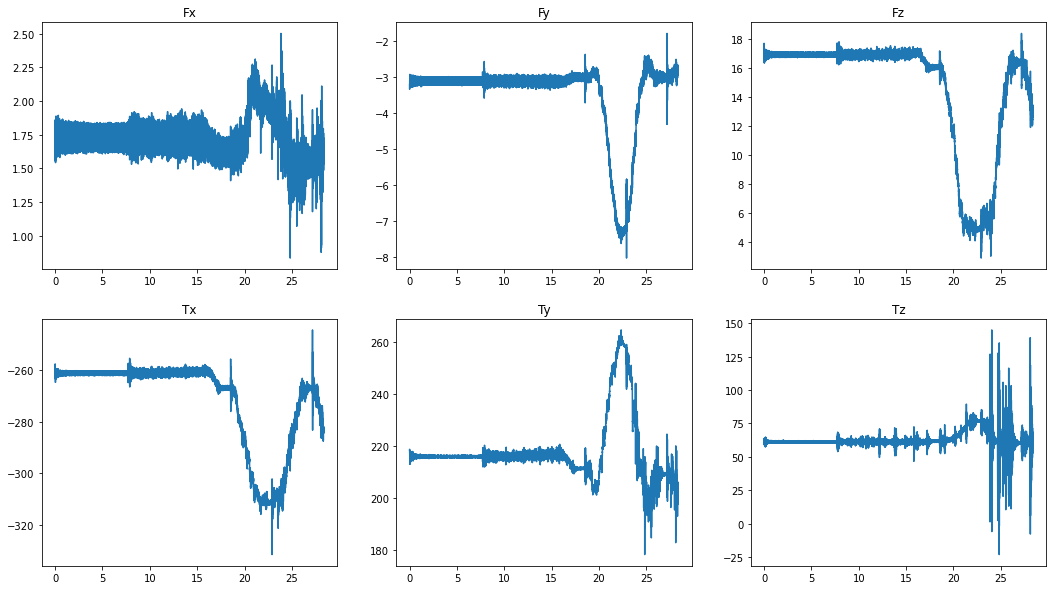

In [82]:
t_start = test_cmd_pressing[0, 0]
t_end = test_cmd_pressing[-1, 0]

start_idx = -1
end_idx = -1
for i in range(len(force_data.force)):
    if start_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_start:
        start_idx = i
    if end_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_end:
        end_idx = i
        break

force_pressing = force_data.force[start_idx:end_idx]
print(start_idx, end_idx)

force_data_np = np.zeros((len(force_pressing), 7))
for i in range(len(force_pressing)):
    data = force_pressing[i]
    force_data_np[i] = [int(data.timestamp.split('.')[0]), data.force.x, data.force.y, data.force.z, data.torque.x, data.torque.y, data.torque.z]

print(force_data_np.shape)
force_data_np[:, 0] = (force_data_np[:, 0] - force_data_np[0, 0]) * (10**-9)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].plot(force_data_np[:, 0], force_data_np[:, 1], label='Fx')
axs[0, 0].set_title('Fx')
axs[0, 1].plot(force_data_np[:, 0], force_data_np[:, 2], label='Fy')
axs[0, 1].set_title('Fy')
axs[0, 2].plot(force_data_np[:, 0], force_data_np[:, 3], label='Fz')
axs[0, 2].set_title('Fz')
axs[1, 0].plot(force_data_np[:, 0], force_data_np[:, 4], label='Tx')
axs[1, 0].set_title('Tx')
axs[1, 1].plot(force_data_np[:, 0], force_data_np[:, 5], label='Ty')
axs[1, 1].set_title('Ty')
axs[1, 2].plot(force_data_np[:, 0], force_data_np[:, 6], label='Tz')
axs[1, 2].set_title('Tz')
plt.show()


0 513980
(513980, 7)


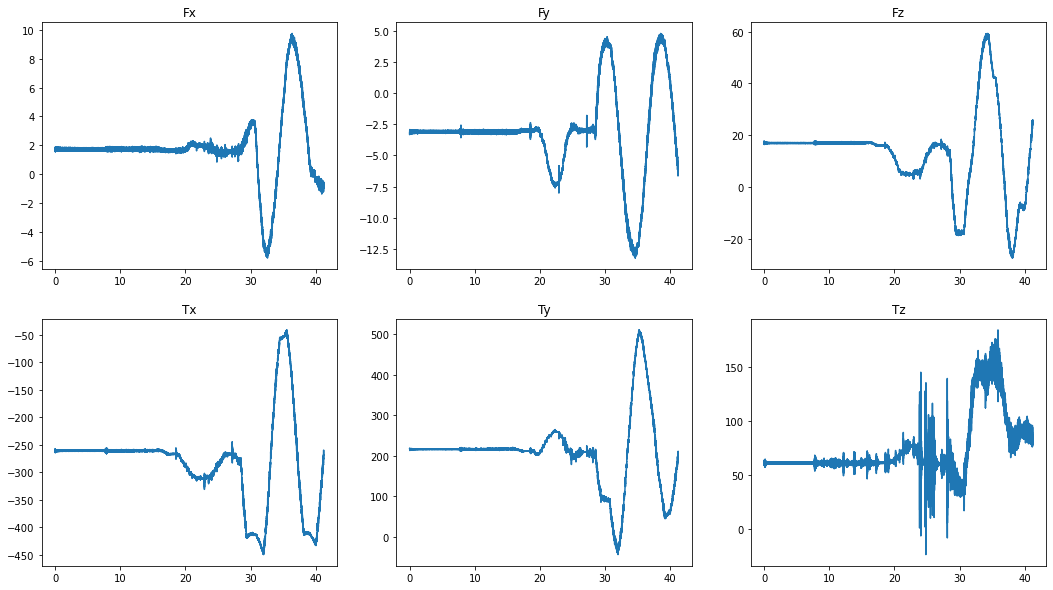

In [83]:
t_start = test_cmd_precision[0, 0]
t_end = test_cmd_precision[-1, 0]

start_idx = -1
end_idx = -1
for i in range(len(force_data.force)):
    if start_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_start:
        start_idx = i
    if end_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_end:
        end_idx = i
        break

force_precision = force_data.force[start_idx:end_idx]
print(start_idx, end_idx)

force_data_np = np.zeros((len(force_precision), 7))
for i in range(len(force_precision)):
    data = force_precision[i]
    force_data_np[i] = [int(data.timestamp.split('.')[0]), data.force.x, data.force.y, data.force.z, data.torque.x, data.torque.y, data.torque.z]

print(force_data_np.shape)
force_data_np[:, 0] = (force_data_np[:, 0] - force_data_np[0, 0]) * (10**-9)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].plot(force_data_np[:, 0], force_data_np[:, 1], label='Fx')
axs[0, 0].set_title('Fx')
axs[0, 1].plot(force_data_np[:, 0], force_data_np[:, 2], label='Fy')
axs[0, 1].set_title('Fy')
axs[0, 2].plot(force_data_np[:, 0], force_data_np[:, 3], label='Fz')
axs[0, 2].set_title('Fz')
axs[1, 0].plot(force_data_np[:, 0], force_data_np[:, 4], label='Tx')
axs[1, 0].set_title('Tx')
axs[1, 1].plot(force_data_np[:, 0], force_data_np[:, 5], label='Ty')
axs[1, 1].set_title('Ty')
axs[1, 2].plot(force_data_np[:, 0], force_data_np[:, 6], label='Tz')
axs[1, 2].set_title('Tz')
plt.show()

0 835219
(835219, 7)


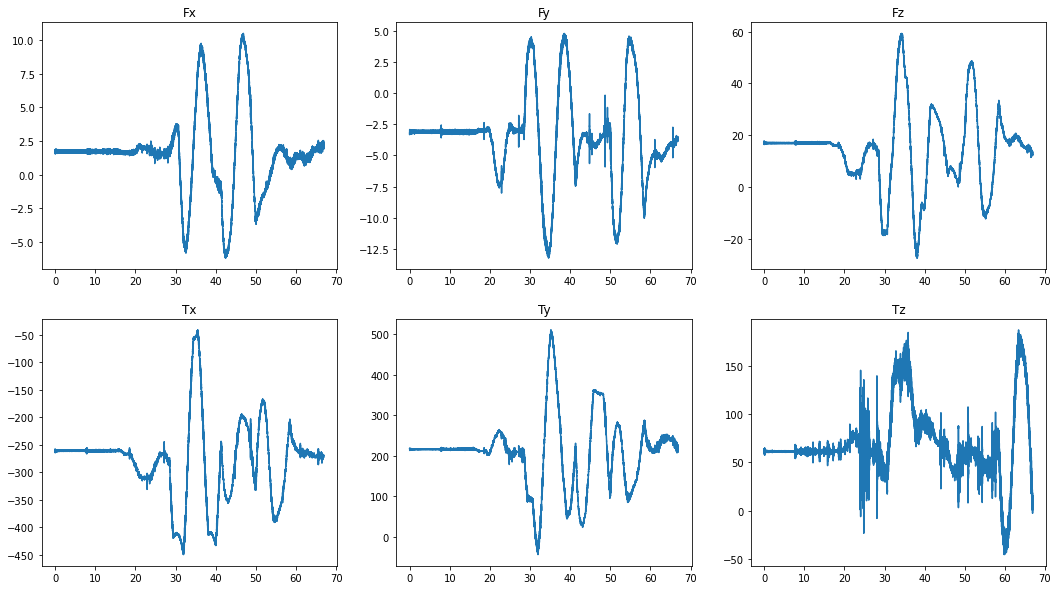

In [84]:
t_start = test_cmd_slipping[0, 0]
t_end = test_cmd_slipping[-1, 0]

start_idx = -1
end_idx = -1
for i in range(len(force_data.force)):
    if start_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_start:
        start_idx = i
    if end_idx == -1 and int(force_data.force[i].timestamp.split('.')[0]) > t_end:
        end_idx = i
        break

force_slipping = force_data.force[start_idx:end_idx]
print(start_idx, end_idx)

force_data_np = np.zeros((len(force_slipping), 7))
for i in range(len(force_slipping)):
    data = force_slipping[i]
    force_data_np[i] = [int(data.timestamp.split('.')[0]), data.force.x, data.force.y, data.force.z, data.torque.x, data.torque.y, data.torque.z]

print(force_data_np.shape)
force_data_np[:, 0] = (force_data_np[:, 0] - force_data_np[0, 0]) * (10**-9)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].plot(force_data_np[:, 0], force_data_np[:, 1], label='Fx')
axs[0, 0].set_title('Fx')
axs[0, 1].plot(force_data_np[:, 0], force_data_np[:, 2], label='Fy')
axs[0, 1].set_title('Fy')
axs[0, 2].plot(force_data_np[:, 0], force_data_np[:, 3], label='Fz')
axs[0, 2].set_title('Fz')
axs[1, 0].plot(force_data_np[:, 0], force_data_np[:, 4], label='Tx')
axs[1, 0].set_title('Tx')
axs[1, 1].plot(force_data_np[:, 0], force_data_np[:, 5], label='Ty')
axs[1, 1].set_title('Ty')
axs[1, 2].plot(force_data_np[:, 0], force_data_np[:, 6], label='Tz')
axs[1, 2].set_title('Tz')
plt.show()

In [85]:
pose_pressing = cmd_pressing.replace('cmd', 'pose')
pose_precision = cmd_precision.replace('cmd', 'pose')
pose_slipping = cmd_slipping.replace('cmd', 'pose')
print(pose_pressing, pose_precision, pose_slipping)
print(cmd_dir)

d_rigid_flat_pose_pressing_0.csv d_rigid_flat_pose_precision_0.csv d_rigid_flat_pose_slipping_0.csv
/home/hrg/ws_moveit/data/short_rigid_letters_2407_D_rigid/kinova/


Text(0.5, 1.0, 'Real Pose')

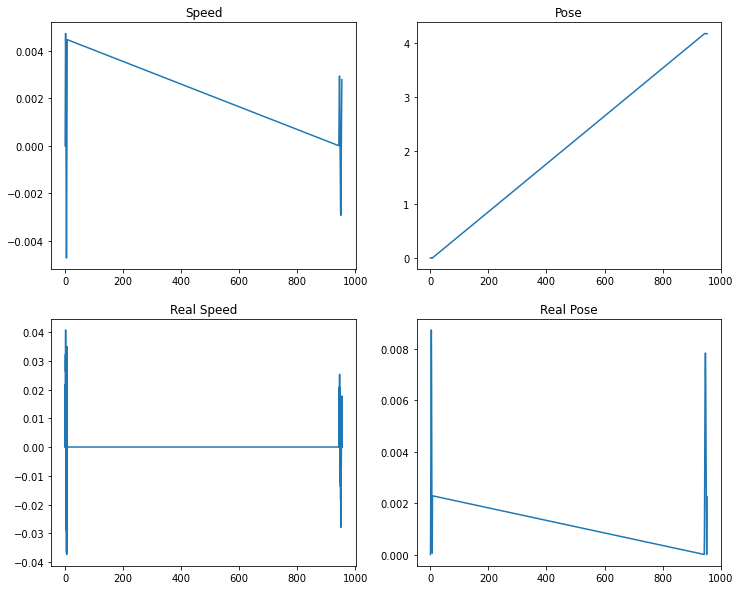

In [86]:
test_pose_pressing = genfromtxt(cmd_dir + pose_pressing, delimiter=',')
test_pose_precision = genfromtxt(cmd_dir + pose_precision, delimiter=',')
test_pose_slipping = genfromtxt(cmd_dir + pose_slipping, delimiter=',')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
t_cmd = (test_cmd_pressing[:, 0] - test_cmd_pressing[0, 0]) * (10**-9)
speed_z = test_cmd_pressing[:, 3]
pose_z = np.zeros(test_cmd_pressing.shape[0])
dt = 0.01
for i in range(test_cmd_pressing.shape[0]-1):
  dt = t_cmd[i+1] - t_cmd[i]
  pose_z[i+1] = pose_z[i] + speed_z[i]*dt

axs[0, 0].plot(t_cmd, speed_z)
axs[0, 0].set_title('Speed')
axs[0, 1].plot(t_cmd, pose_z)
axs[0, 1].set_title('Pose')

t_pose = (test_pose_pressing[:, 0] - test_pose_pressing[0, 0]) * (10**-9)
real_z = test_pose_pressing[:, 3]
real_v_z = np.zeros(test_pose_pressing.shape[0])
for i in range(test_pose_pressing.shape[0]-1):
  dt = t_pose[i+1] - t_pose[i]
  real_v_z[i+1] = (real_z[i+1] - real_z[i]) / dt

axs[1, 0].plot(t_pose, real_v_z)
axs[1, 0].set_title('Real Speed')
axs[1, 1].plot(t_pose, real_z)
axs[1, 1].set_title('Real Pose')

Text(0.5, 1.0, 'angular_z')

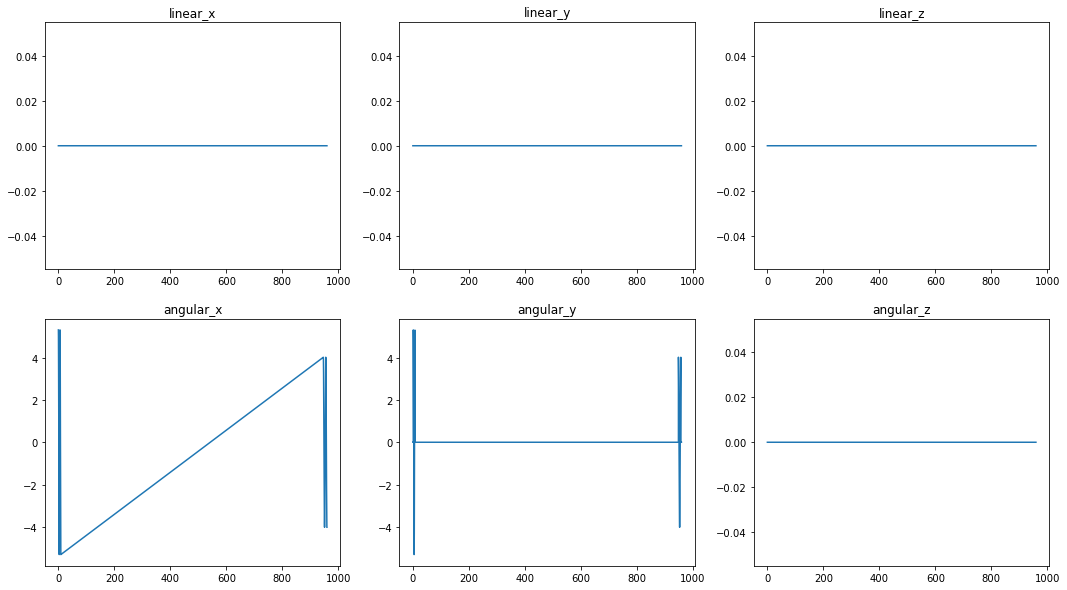

In [87]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_cmd = (test_cmd_precision[:, 0] - test_cmd_precision[0, 0]) * (10**-9)
axs[0, 0].plot(t_cmd, test_cmd_precision[:, 1])
axs[0, 0].set_title('linear_x')
axs[0, 1].plot(t_cmd, test_cmd_precision[:, 2])
axs[0, 1].set_title('linear_y')
axs[0, 2].plot(t_cmd, test_cmd_precision[:, 3])
axs[0, 2].set_title('linear_z')
axs[1, 0].plot(t_cmd, test_cmd_precision[:, 4])
axs[1, 0].set_title('angular_x')
axs[1, 1].plot(t_cmd, test_cmd_precision[:, 5])
axs[1, 1].set_title('angular_y')
axs[1, 2].plot(t_cmd, test_cmd_precision[:, 6])
axs[1, 2].set_title('angular_z')

Text(0.5, 1.0, 'euler_z')

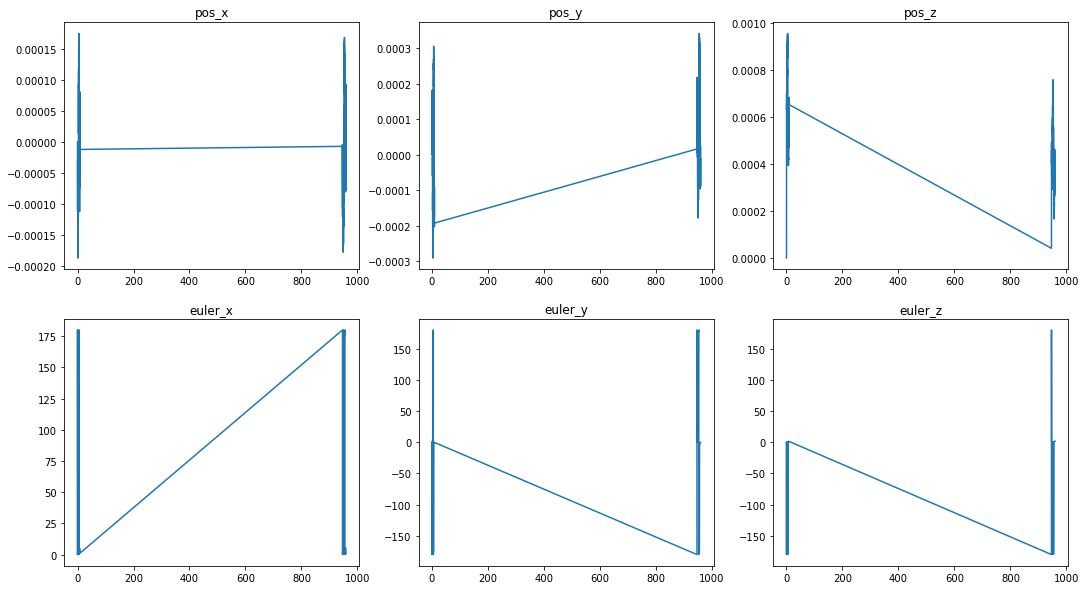

In [88]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_pose = (test_pose_precision[:, 0] - test_pose_precision[0, 0]) * (10**-9)
axs[0, 0].plot(t_pose, test_pose_precision[:, 1])
axs[0, 0].set_title('pos_x')
axs[0, 1].plot(t_pose, test_pose_precision[:, 2])
axs[0, 1].set_title('pos_y')
axs[0, 2].plot(t_pose, test_pose_precision[:, 3])
axs[0, 2].set_title('pos_z')
axs[1, 0].plot(t_pose, test_pose_precision[:, 4])
axs[1, 0].set_title('euler_x')
axs[1, 1].plot(t_pose, test_pose_precision[:, 5])
axs[1, 1].set_title('euler_y')
axs[1, 2].plot(t_pose, test_pose_precision[:, 6])
axs[1, 2].set_title('euler_z')

Text(0.5, 1.0, 'angular_z')

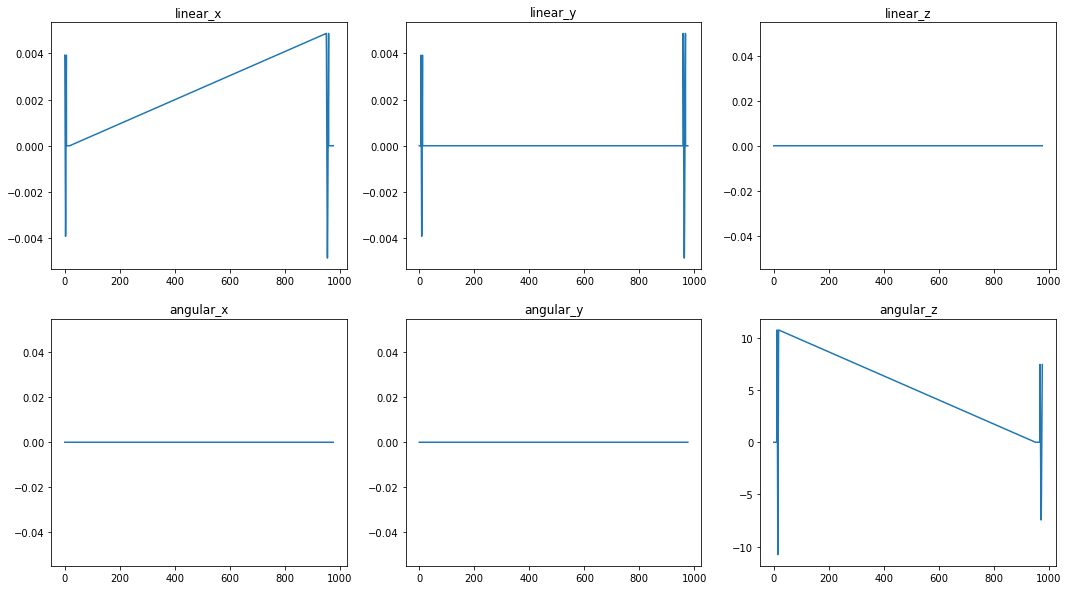

In [89]:

t_cmd = (test_cmd_slipping[:, 0] - test_cmd_slipping[0, 0]) * (10**-9)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].plot(t_cmd, test_cmd_slipping[:, 1])
axs[0, 0].set_title('linear_x')
axs[0, 1].plot(t_cmd, test_cmd_slipping[:, 2])
axs[0, 1].set_title('linear_y')
axs[0, 2].plot(t_cmd, test_cmd_slipping[:, 3])
axs[0, 2].set_title('linear_z')
axs[1, 0].plot(t_cmd, test_cmd_slipping[:, 4])
axs[1, 0].set_title('angular_x')
axs[1, 1].plot(t_cmd, test_cmd_slipping[:, 5])
axs[1, 1].set_title('angular_y')
axs[1, 2].plot(t_cmd, test_cmd_slipping[:, 6])
axs[1, 2].set_title('angular_z')

Text(0.5, 1.0, 'euler_z')

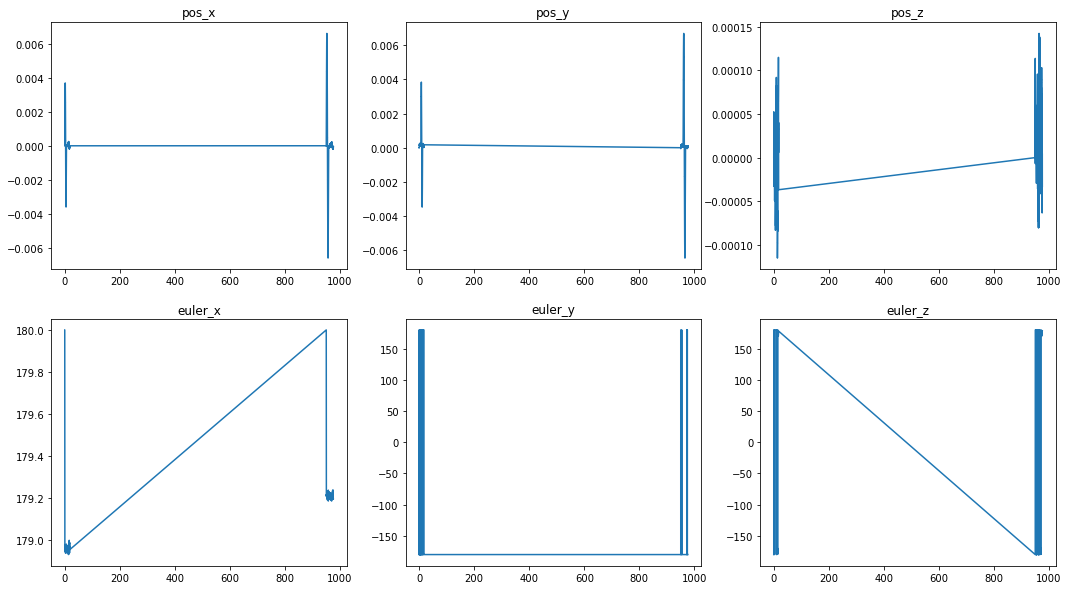

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
t_pose = (test_pose_slipping[:, 0] - test_pose_slipping[0, 0]) * (10**-9)
axs[0, 0].plot(t_pose, test_pose_slipping[:, 1])
axs[0, 0].set_title('pos_x')
axs[0, 1].plot(t_pose, test_pose_slipping[:, 2])
axs[0, 1].set_title('pos_y')
axs[0, 2].plot(t_pose, test_pose_slipping[:, 3])
axs[0, 2].set_title('pos_z')
axs[1, 0].plot(t_pose, test_pose_slipping[:, 4])
axs[1, 0].set_title('euler_x')
axs[1, 1].plot(t_pose, test_pose_slipping[:, 5])
axs[1, 1].set_title('euler_y')
axs[1, 2].plot(t_pose, test_pose_slipping[:, 6])
axs[1, 2].set_title('euler_z')